<a href="https://colab.research.google.com/github/ANDRERAIMUNDO/Atividade-2.1-Linear-regression-and-metrics-PPGCC-2025_1/blob/main/Atividade_2_1_Linear_regression_and_metrics_PPGCC_2025_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para cada parte da atividade, colocar o comando do problema e fazer uma introdução com figuras, equações e texto contextualizando o problema

# Questão A

Com o mesmo dataset da Atividade 2, faça boxplots de duas features do dataset,conforme procedimentomostrado em sala. Para cada boxplot calcule:
*   Cv
*   Curtose
*   Skewness
*   Mean
*   Moda

Analise os resultados.
Para um desses boxplots, introduza artificialmente outliers e verifique o que ocorre com o boxplot e essas métricas. Não esqueça do contexto sobre o dataset usado, com a explicação sobre ele, suas classes e features.

In [6]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/ANDRERAIMUNDO/data-atividade-2/main/rootcause_success.csv'
data = pd.read_csv(url)
display(data.head(5))

,RootCause,Ocorrencias_anteriores,Tempo_medio_resolucao,Prioridade_resolucao
0,Problema de rede,4,3.03,Média
1,Erro no sistema de monitoramento,2,4.60,Média
2,Erro de software,2,3.63,Baixa
3,Curto-circuito,1,3.46,Média
4,Atualização mal aplicada,4,4.43,Alta


**Contextualizando:** Este código utiliza o dataset "rootcause_success" para analisar duas variáveis quantitativas: "Ocorrencias_anteriores" e "Tempo_medio_resolucao". Foi introduzido artificialmente outliers no segundo bloco de código para avaliar seu impacto visual e estatístico no conjunto de dados e representação gráfica frente a valores extremos.

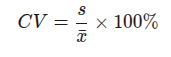

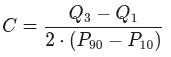

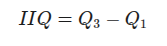

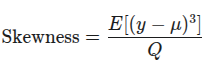

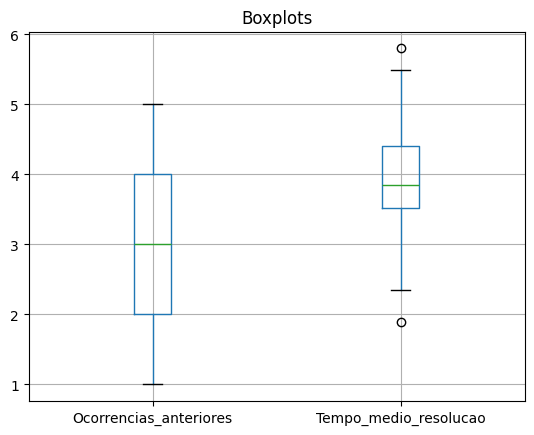

Occurrences
Mean = 3.1
SD = 1.4
Mode = 2
----------------
Resolution
Mean = 3.9
SD = 0.7
Mode = 3.59
----------------
CV Occurrences = 45.08%
CV Resolution = 16.72%
Curtose Ocorrencias_anteriores: -1.33
Curtose Tempo_medio_resolucao: -0.09
Skewness Ocorrencias_anteriores: -0.05
Skewness Tempo_medio_resolucao: 0.06


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

url = 'https://raw.githubusercontent.com/ANDRERAIMUNDO/data-atividade-2/main/rootcause_success.csv'
data = pd.read_csv(url)
#A
mean_a = np.mean(data['Ocorrencias_anteriores'])#mean
std_dev_a = np.std(data['Ocorrencias_anteriores'], ddof=1)
moda_a = data['Ocorrencias_anteriores'].mode()[0]
cv_a = (std_dev_a/mean_a)*100
kurt_a = kurtosis(data['Ocorrencias_anteriores'], fisher=True)#curtose
skew_a = skew(data['Ocorrencias_anteriores'])
#B
mean_b = np.mean(data['Tempo_medio_resolucao'])#mean
std_dev_b = np.std(data['Tempo_medio_resolucao'], ddof=1)
moda_b = data['Tempo_medio_resolucao'].mode()[0]  #continuous quantitative
cv_b = (std_dev_b/mean_b)*100
kurt_b = kurtosis(data['Tempo_medio_resolucao'], fisher=True)#curtose
skew_b = skew(data['Tempo_medio_resolucao'])

data[['Ocorrencias_anteriores', 'Tempo_medio_resolucao']].boxplot()
plt.title('Boxplots')
plt.show()

print(f"Occurrences")
print(f"Mean = {mean_a:.1f}")
print(f"SD = {std_dev_a:.1f}")
print(f"Mode = {moda_a}")
print("----------------")
print(f"Resolution")
print(f"Mean = {mean_b:.1f}")
print(f"SD = {std_dev_b:.1f}")
print(f"Mode = {moda_b}")
print("----------------")
print(f"CV Occurrences = {cv_a:.2f}%")
print(f"CV Resolution = {cv_b:.2f}%")
print(f"Curtose Ocorrencias_anteriores: {kurt_a:.2f}")
print(f"Curtose Tempo_medio_resolucao: {kurt_b:.2f}")
print(f"Skewness Ocorrencias_anteriores: {skew_a:.2f}")
print(f"Skewness Tempo_medio_resolucao: {skew_b:.2f}")

Segundo bloco, introduzido outliers para analise de valores atípicos ou mais extremos.

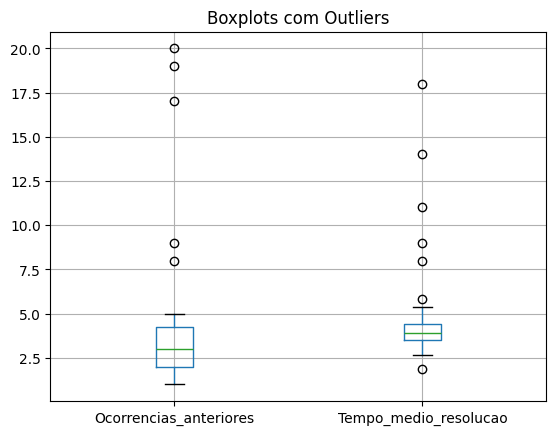

Curtose Ocorrencias_anteriores: 15.29
Curtose Tempo_medio_resolucao: 23.58
Skewness Ocorrencias_anteriores: 3.57
Skewness Tempo_medio_resolucao: 4.51


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

url = 'https://raw.githubusercontent.com/ANDRERAIMUNDO/data-atividade-2/main/rootcause_success.csv'
data = pd.read_csv(url)
#A
sample_a = np.random.choice(data['Ocorrencias_anteriores'], size=95, replace=True)
out_a = [20, 19, 9, 17, 8]
outliers_a = np.append(sample_a, out_a)
kurt_a = kurtosis(outliers_a, fisher=True)
skew_a = skew(outliers_a)
#B
sample_b = np.random.choice(data['Tempo_medio_resolucao'], size=95, replace=True)
out_b = [8, 9, 11, 14, 18]
outliers_b = np.append(sample_b, out_b)
kurt_b = kurtosis(outliers_b, fisher=True)
skew_b = skew(outliers_b)

data_aux = pd.DataFrame({'Ocorrencias_anteriores': outliers_a,'Tempo_medio_resolucao': outliers_b})
data_aux[['Ocorrencias_anteriores', 'Tempo_medio_resolucao']].boxplot()
plt.title('Boxplots com Outliers')
plt.show()

print(f"Curtose Ocorrencias_anteriores: {kurt_a:.2f}")
print(f"Curtose Tempo_medio_resolucao: {kurt_b:.2f}")
print(f"Skewness Ocorrencias_anteriores: {skew_a:.2f}")
print(f"Skewness Tempo_medio_resolucao: {skew_b:.2f}")